# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559708 sha256=9a8011b374d137d378130a10cddbfb3a65aeb28962fa271708767a4b700ca728
  Stored in directory: C:\Users\awatr1\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""


# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{weather_api_key}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

# Drop the rows that have been added with no data or partial data
clean_Weather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | tabiauea
City not found. Skipping...
Processing record 1 | bendigo
Processing record 2 | hilo
Processing record 3 | hobart
Processing record 4 | bluff
Processing record 5 | asosa
Processing record 6 | taolanaro
City not found. Skipping...
Processing record 7 | yirol
City not found. Skipping...
Processing record 8 | warqla
City not found. Skipping...
Processing record 9 | chippewa falls
Processing record 10 | dingle
Processing record 11 | jamestown
Processing record 12 | urdzhar
City not found. Skipping...
Processing record 13 | port lincoln
Processing record 14 | ancud
Processing record 15 | sete lagoas
Processing record 16 | mar del plata
Processing record 17 | mataura
Processing record 18 | punta arenas
Processing record 19 | vaini
Processing record 20 | khatanga
Processing record 21 | rikitea
Processing record 22 | busselton
Processing record 23 | bulgan
Processing record 24 | thompson
Processing record 2

Processing record 224 | faya
Processing record 225 | ramsar
Processing record 226 | montepuez
Processing record 227 | nancha
Processing record 228 | lakes entrance
Processing record 229 | los llanos de aridane
Processing record 230 | vao
Processing record 231 | bud
Processing record 232 | anchorage
Processing record 233 | eureka
Processing record 234 | agadez
Processing record 235 | ilulissat
Processing record 236 | sur
Processing record 237 | bambous virieux
Processing record 238 | dowa
Processing record 239 | satitoa
City not found. Skipping...
Processing record 240 | san patricio
Processing record 241 | san policarpo
Processing record 242 | hobyo
Processing record 243 | boca do acre
Processing record 244 | plettenberg bay
Processing record 245 | shirokiy
Processing record 246 | santa cruz
Processing record 247 | longlac
City not found. Skipping...
Processing record 248 | bosaso
Processing record 249 | padang
Processing record 250 | saryshagan
City not found. Skipping...
Processing r

Processing record 452 | komsomolets
Processing record 453 | kihei
Processing record 454 | todos santos
Processing record 455 | urumqi
Processing record 456 | plouzane
Processing record 457 | sehithwa
Processing record 458 | hihifo
City not found. Skipping...
Processing record 459 | okha
Processing record 460 | talara
Processing record 461 | ust-kuyga
Processing record 462 | iznoski
Processing record 463 | goiatuba
Processing record 464 | khingansk
Processing record 465 | quatre cocos
Processing record 466 | galbshtadt
Processing record 467 | umzimvubu
City not found. Skipping...
Processing record 468 | jalu
Processing record 469 | inhambane
Processing record 470 | khonuu
City not found. Skipping...
Processing record 471 | visnes
Processing record 472 | vuktyl
Processing record 473 | kadykchan
City not found. Skipping...
Processing record 474 | great bend
Processing record 475 | porto real
Processing record 476 | waitati
Processing record 477 | oranjestad
Processing record 478 | ambon
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weatherDF.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [26]:
# Output to data file previously defined
clean_Weather.to_csv("output_data/output.csv")
# Display the final dataframe
clean_Weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Bendigo,39,AU,1579401471,47,-36.77,144.28,97,4
2,Hilo,20,US,1579401471,57,19.73,-155.09,80.6,10.29
3,Hobart,75,AU,1579401424,49,-42.88,147.33,73.99,17.22
4,Bluff,100,NZ,1579401472,73,-46.6,168.33,61.3,8.41
5,Asosa,0,ET,1579401472,43,10.07,34.53,65.01,8.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

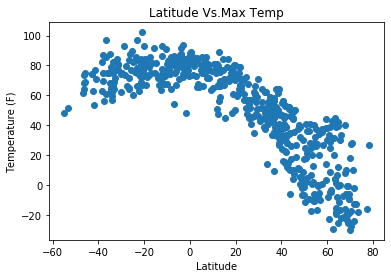

In [21]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(clean_Weather["Lat"],clean_Weather["Max Temp"],marker ="o")
plt.title("Latitude Vs.Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# Save the figure to the output folder
plt.savefig("output_data/LatitudevsTemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

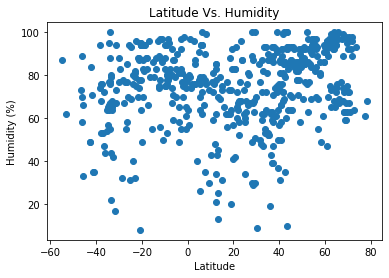

In [22]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(clean_Weather["Lat"],clean_Weather["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/LatitudevsHumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

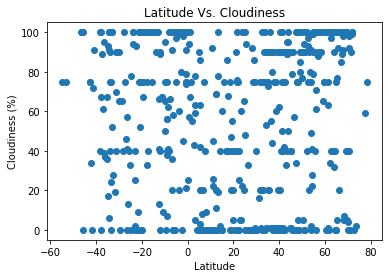

In [23]:
#Latitude Scatter Vs Cloudiness Plot
plt.scatter(clean_Weather["Lat"],clean_Weather["Cloudiness"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/LatitudevsCloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

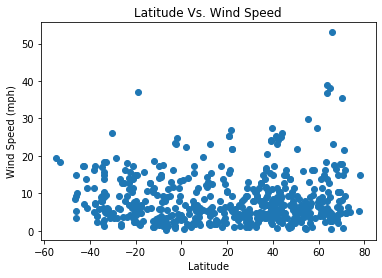

In [24]:
#Latitude Vs Wind Speed Scatter Plot
plt.scatter(clean_Weather["Lat"],clean_Weather["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/LatitudevsWindSpeedPlot.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


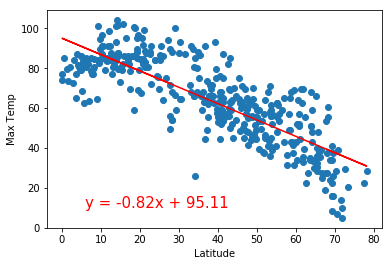

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


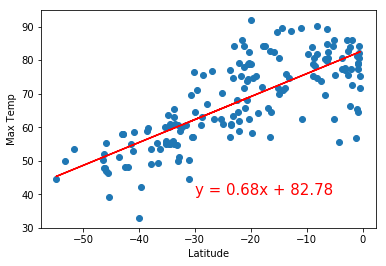

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


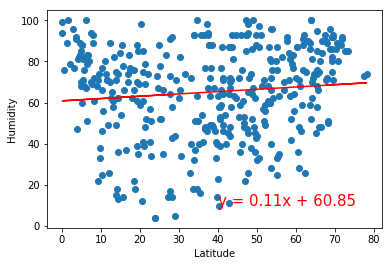

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


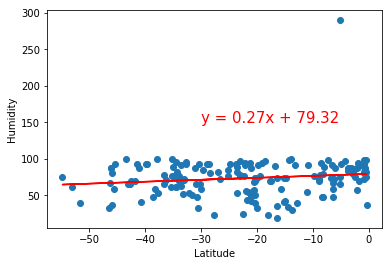

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


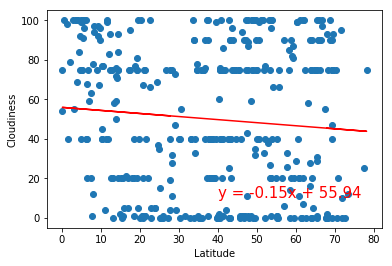

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


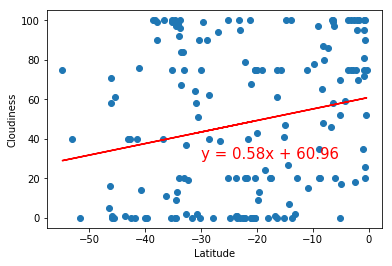

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


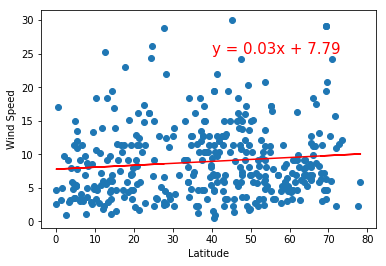

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


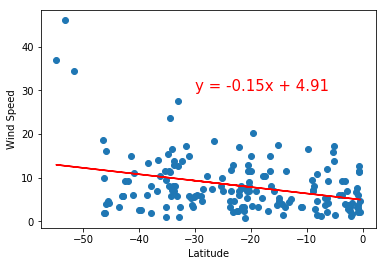